In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
df=pd.read_csv('/Users/bryan/code/VonRiecken/Power-Predict/power_predict/data/merged_dataset.csv')
df

,Unnamed: 0,Month_year,Country,Balance,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind,value_CDD_18,value_CDD_21,value_Global_Horizontal_Irrandiance,value_HDD_16,value_HDD_18,value_Heat_index,value_Relative_Humidty,value_Temperature,value_Total_Precipitation,"total target (wind, solar, hydro)"
0,0,2010-04-01,Australia,Net Electricity Production,216.2870,1044.4060,0.0000,26.8110,1638.0980,350.5110,48.13000,12.620000,720994.0,17.470,37.08,18.410,57.37,23.210,0.05483,1421.7280
1,1,2010-04-01,Austria,Net Electricity Production,350.3830,2504.1300,0.0000,9.9650,2995.6960,131.1070,0.05449,0.000000,736161.0,228.900,287.80,8.410,69.85,6.748,0.10510,2645.2020
2,2,2010-04-01,Belgium,Net Electricity Production,383.1770,141.8980,0.0000,80.4190,702.5090,97.0150,0.99160,0.000000,723195.0,195.800,253.70,9.577,67.90,9.322,0.03999,319.3320
3,3,2010-04-01,Canada,Net Electricity Production,712.9880,28243.7380,2.4400,24.1840,29709.3010,725.9510,0.06883,0.000023,679927.0,246.700,306.20,7.797,70.85,-1.708,0.05456,28993.8730
4,4,2010-04-01,Chile,Net Electricity Production,152.8260,1740.4160,0.0000,0.0000,1913.6010,20.3590,1.41100,0.040190,578355.0,113.000,168.30,12.440,66.58,9.672,0.15780,1760.7750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,6713,2022-09-01,Spain,Net Electricity Production,478.4796,1459.6225,1.5000,3213.8391,9351.9487,4198.5075,112.80000,48.410000,748831.0,5.679,13.65,21.360,60.24,20.190,0.06919,8871.9691
6714,6714,2022-09-01,Sweden,Net Electricity Production,819.7182,5992.2339,0.0000,101.3747,8900.2441,1986.9173,0.00000,0.000000,314577.0,137.000,197.00,11.430,80.39,9.229,0.09243,8080.5259
6715,6715,2022-09-01,Switzerland,Net Electricity Production,173.8267,2753.3512,0.0000,337.7122,3276.0098,11.1196,3.99700,0.000000,565099.0,109.400,157.60,12.880,79.31,10.330,0.24790,3102.1830
6716,6716,2022-09-01,United Kingdom,Net Electricity Production,3122.6177,367.4721,0.4559,1385.7783,10397.5687,5521.2446,2.85300,0.000000,422664.0,65.670,113.30,14.320,80.52,13.800,0.14530,7274.4950


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         6718 non-null   int64  
 1   Month_year                                         6718 non-null   object 
 2   Country                                            6718 non-null   object 
 3   Balance                                            6718 non-null   object 
 4   Combustible Renewables                             6718 non-null   float64
 5   Hydro                                              6718 non-null   float64
 6   Other Renewables                                   6718 non-null   float64
 7   Solar                                              6718 non-null   float64
 8   Total Renewables (Hydro, Geo, Solar, Wind, Other)  6718 non-null   float64
 9   Wind    

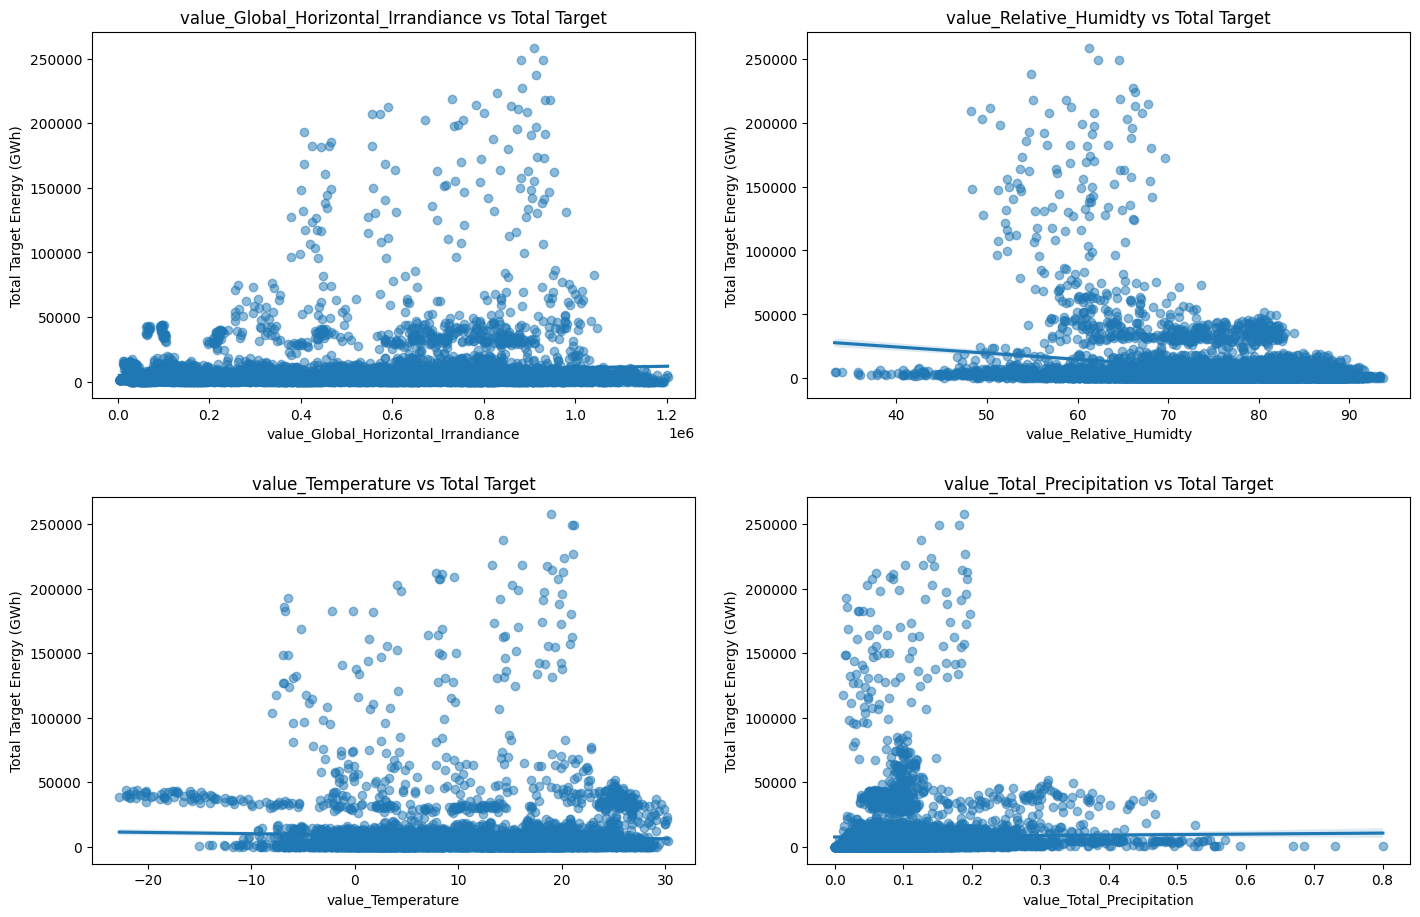

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

features = [
    # 'Combustible Renewables',
    # 'Hydro',
    # 'Other Renewables',
    # 'Solar',
    'value_Global_Horizontal_Irrandiance',
    'value_Relative_Humidty',
    'value_Temperature',
    'value_Total_Precipitation',
]

num_features = len(features)
num_rows = num_features // 2 + num_features % 2  

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    
    sns.regplot(x=feature, y=df['total target (wind, solar, hydro)'], data=df, ax=axes[row, col], scatter_kws={'alpha':0.5})
    
    axes[row, col].set_title(f'{feature} vs Total Target')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Total Target Energy (GWh)')

if num_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

In [11]:
print(df.columns)


Index(['Unnamed: 0', 'Month_year', 'Country', 'Balance',
       'Combustible Renewables', 'Hydro', 'Other Renewables', 'Solar',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Wind',
       'value_CDD_18', 'value_CDD_21', 'value_Global_Horizontal_Irrandiance',
       'value_HDD_16', 'value_HDD_18', 'value_Heat_index',
       'value_Relative_Humidty', 'value_Temperature',
       'value_Total_Precipitation', 'total target (wind, solar, hydro)'],
      dtype='object')


### Standard Scaler model

In [12]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# StandardScaler object
scaler = StandardScaler()

# Scaled numerical features
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X[numerical_columns]

NameError: name 'X' is not defined

### Logistical Regression Scaled

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# StandardScaler object
scaler = StandardScaler()

# Scaled numerical features
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split data train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()

# Fit 
model.fit(X_train, y_train)

# predictions on the testing data
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Coefficient of Determination (COD)
cod = r2_score(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Coefficient of Determination (COD): {cod}')
print(f'R-squared: {r2}')

NameError: name 'X' is not defined

### Regularization using Lasso for multicollinearity

In [14]:
from sklearn.linear_model import Lasso

#  L1 regularization (Lasso)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

# predictions on the testing data
y_pred_lasso = model_lasso.predict(X_test)

# Mean Absolute Error
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Coefficient of Determination (COD)
cod_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'Coefficient of Determination (COD) - Lasso: {cod_lasso}')


NameError: name 'X_train' is not defined

###### regularization has not significantly affected the performance of your model.

In [15]:
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_lasso.coef_})
print(lasso_coefficients)

NameError: name 'X' is not defined

# PCA

In [16]:
target_column_name = 'total target (wind, solar, hydro)'

X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)) 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)
print("Mean Absolute Error on Test Set:", mae)
print("R-squared on Test Set:", r2)


NameError: name 'train_test_split' is not defined

# Residuals

In [17]:
import matplotlib.pyplot as plt
y_pred = final_model.predict(X_test)

# residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


NameError: name 'final_model' is not defined

### One Hot enconder not scaled

In [18]:
#categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#one-hot encoding to categorical columns
X = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
X

,Unnamed: 0,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind,value_CDD_18,value_CDD_21,value_Global_Horizontal_Irrandiance,...,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovak Republic,Country_Slovenia,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States
0,0,216.2870,1044.4060,0.0000,26.8110,1638.0980,350.5110,48.13000,12.620000,720994.0,...,False,False,False,False,False,False,False,False,False,False
1,1,350.3830,2504.1300,0.0000,9.9650,2995.6960,131.1070,0.05449,0.000000,736161.0,...,False,False,False,False,False,False,False,False,False,False
2,2,383.1770,141.8980,0.0000,80.4190,702.5090,97.0150,0.99160,0.000000,723195.0,...,False,False,False,False,False,False,False,False,False,False
3,3,712.9880,28243.7380,2.4400,24.1840,29709.3010,725.9510,0.06883,0.000023,679927.0,...,False,False,False,False,False,False,False,False,False,False
4,4,152.8260,1740.4160,0.0000,0.0000,1913.6010,20.3590,1.41100,0.040190,578355.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,6713,478.4796,1459.6225,1.5000,3213.8391,9351.9487,4198.5075,112.80000,48.410000,748831.0,...,False,False,False,False,False,True,False,False,False,False
6714,6714,819.7182,5992.2339,0.0000,101.3747,8900.2441,1986.9173,0.00000,0.000000,314577.0,...,False,False,False,False,False,False,True,False,False,False
6715,6715,173.8267,2753.3512,0.0000,337.7122,3276.0098,11.1196,3.99700,0.000000,565099.0,...,False,False,False,False,False,False,False,True,False,False
6716,6716,3122.6177,367.4721,0.4559,1385.7783,10397.5687,5521.2446,2.85300,0.000000,422664.0,...,False,False,False,False,False,False,False,False,True,False


### One Hot enconder scaled

In [19]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv('/Users/bryan/code/VonRiecken/Power-Predict/power_predict/data/merged_dataset.csv')

categorical_columns = df.select_dtypes(include=['object']).columns

numerical_columns = df.select_dtypes(exclude=['object']).columns

# transformers for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_columns)
    ])

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit
df_transformed = pipeline.fit_transform(df)

# feature names after one-hot encoding
feature_names = list(numerical_columns) + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=feature_names)

df_transformed.head()


/Users/bryan/.pyenv/versions/3.10.6/envs/Power-Predict/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind,value_CDD_18,value_CDD_21,value_Global_Horizontal_Irrandiance,...,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovak Republic,Country_Slovenia,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States
0,-1.731793,-0.371839,-0.288311,-0.219984,-0.279923,-0.316003,-0.268083,0.139958,-0.151031,0.523027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.731277,-0.284767,-0.186769,-0.219984,-0.285258,-0.257861,-0.302890,-0.559862,-0.445247,0.573405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.730762,-0.263473,-0.351091,-0.219984,-0.262948,-0.356072,-0.308299,-0.546221,-0.445247,0.530337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.730246,-0.049320,1.603731,0.079841,-0.280755,0.886205,-0.208521,-0.559654,-0.445247,0.386620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.729730,-0.413045,-0.239895,-0.219984,-0.288413,-0.304204,-0.320460,-0.540116,-0.444310,0.049241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression not scaled

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
y = df['total target (wind, solar, hydro)']

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()

# Fit 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
cod = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Coefficient of Determination (COD): {cod}')
print(f'R-squared: {r2}')

Mean Absolute Error: 8.319501701304857e-10
Mean Squared Error: 9.63137380842184e-19
Coefficient of Determination (COD): 1.0
R-squared: 1.0


### XGBoost unscaled

In [35]:
import xgboost as xgb

# X = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
y = df['total target (wind, solar, hydro)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit 
model.fit(X_train, y_train)

# predict testing data
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Coefficient of Determination (COD)
cod = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Coefficient of Determination (COD): {cod}')


Mean Absolute Error: 177.40084097378679
Coefficient of Determination (COD): 0.9954392355836477


### XGBoost scaled

In [22]:
# numerical features for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# StandardScaler object
scaler = StandardScaler()

# Scaled numerical features
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# predictions on the testing data
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Coefficient of Determination (COD)
cod = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Coefficient of Determination (COD): {cod}')


Mean Absolute Error: 180.5205075637443
Coefficient of Determination (COD): 0.9954820208240055


### Feature importance from the trained XGBoost model


In [23]:
# feature importance from the trained XGBoost model
feature_importance = model.feature_importances_
feature_importance

array([8.02342111e-05, 1.17546401e-03, 5.27775893e-03, 5.09715464e-04,
       9.96511662e-04, 7.86261380e-01, 3.00893706e-04, 6.08995033e-05,
       7.41757802e-04, 2.54378829e-04, 6.15036988e-05, 1.61320713e-05,
       1.15248158e-05, 2.68580887e-04, 6.63963438e-04, 1.93332598e-04,
       1.85044035e-01, 0.00000000e+00, 0.00000000e+00, 1.09752909e-06,
       3.58356124e-06, 6.87443844e-06, 1.34935431e-06, 1.17602326e-06,
       1.52888952e-05, 5.05960361e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.56711076e-07, 0.00000000e+00, 3.44644855e-06,
       2.43373370e-06, 2.36383880e-06, 0.00000000e+00, 0.00000000e+00,
       1.76184230e-07, 1.05352308e-06, 0.00000000e+00, 4.88907347e-07,
       1.28903238e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.07398442e-07, 0.00000000e+00, 5.73293664e-06,
       1.80070310e-06, 0.00000000e+00, 2.74505624e-07, 0.00000000e+00,
       1.19368178e-06, 0.00000000e+00, 2.20957577e-06, 0.00000000e+00,
      

### 

####

### Pipeline

### Train-test split to assess the generalization performance of your model

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("total target (wind, solar, hydro)", axis=1)
y = df["total target (wind, solar, hydro)"]

random_state = 42

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


### Linear Regression with feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Exclude non-numeric columns from scaling
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.825849893735199e-22


### Linear Regression with default parameters

In [26]:
linear_reg_default_model = LinearRegression()
linear_reg_default_model.fit(X_train_numeric, y_train)

y_pred_default = linear_reg_default_model.predict(X_test_numeric)

mse_default = mean_squared_error(y_test, y_pred_default)
print(f'Mean Squared Error (Default Parameters): {mse_default}')


Mean Squared Error (Default Parameters): 1.4968430922743412e-21


 ### Pipeline Initialization

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numeric and non-numeric columns
numeric_features = X_train.select_dtypes(include=['number']).columns
non_numeric_features = X_train.select_dtypes(exclude=['number']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

non_numeric_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply different preprocessing to numeric and non-numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('non_num', non_numeric_transformer, non_numeric_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred

array([1.06452861e+02, 5.40937336e+04, 1.18377948e+02, ...,
       9.25151013e+02, 5.08221437e+01, 6.60015586e+03])

### Hyperparameter Tuning using GridSearchCV

In [28]:
print(df.columns)

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

target_column_name = 'total target (wind, solar, hydro)'
if target_column_name in numeric_features:
    numeric_features.remove(target_column_name)

if 'Month_year' in numeric_features:
    numeric_features.remove('Month_year')
else:
    categorical_features.append('Month_year')

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Index(['Unnamed: 0', 'Month_year', 'Country', 'Balance',
       'Combustible Renewables', 'Hydro', 'Other Renewables', 'Solar',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Wind',
       'value_CDD_18', 'value_CDD_21', 'value_Global_Horizontal_Irrandiance',
       'value_HDD_16', 'value_HDD_18', 'value_Heat_index',
       'value_Relative_Humidty', 'value_Temperature',
       'value_Total_Precipitation', 'total target (wind, solar, hydro)'],
      dtype='object')


NameError: name 'categorical_features' is not defined

### Pipeline with preprocessing

In [29]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor())])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)


NameError: name 'categorical_features' is not defined

###### from above, number of trees = 200 (A higher number of trees may lead to better model performance, but it also increases computation time.)

###### regressor__min_samples_split(minimum number of samples required to split an internal node). Smaller value (2) means that the model is more sensitive to noise, possibly overfitting the training data.

###### regressor__min_samples_leaf(minimum number of samples required to be at a leaf node) Smaller value (2) allows the model to make more complex decisions but might again lead to overfitting.

###### regressor__max_depth (maximum depth of the individual trees). A None value means that nodes will expand until they contain less than min_samples_split samples. A deeper tree can capture more complex patterns, but is more prone to overfitting.

# Retraining model on the entire training dataset

In [30]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', 
                              RandomForestRegressor(n_estimators=200, 
                                                    min_samples_split=2, min_samples_leaf=2, max_depth=None))])

# Retraining model on the entire training dataset
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error on Test Set:", mae)

Mean Absolute Error on Test Set: 131.70266562158702


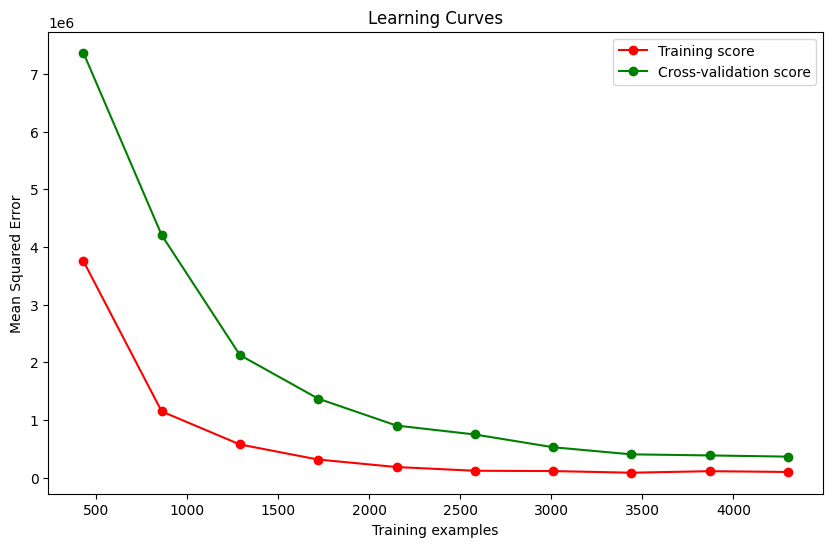

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(n_estimators=200,
                                                                 min_samples_split=2, 
                                                                 min_samples_leaf=2, 
                                                                 max_depth=None))])

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()


### Model Evaluation: Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5 
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# cross-validation
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation Mean Squared Error: {mean_cv_score}")
print(f"Cross-Validation Standard Deviation: {std_cv_score}")


NameError: name 'random_search' is not defined

######  MSE=Value: -327137.61235716665  negative scoring function used (neg_mean_squared_error in scikit-learn). Lower values are better, and the closer to zero, the better the model's performance.

###### CVScore=185082.44589041328 high standard deviation indicates some variability in the model's performance across folds.

### Fit the best model on the entire training dataset


In [ ]:
final_model = random_search.best_estimator_
final_model.fit(X_train, y_train)



### Evaluate the final model on the test set.

In [ ]:
# from sklearn.metrics import mean_squared_error

# #predictions on test set
# y_pred = final_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)

# rmse = np.sqrt(mse)

# r2 = r2_score(y_test, y_pred)

# print("Mean Absolute Error on Test Set:", mae)
# print("R-squared on Test Set:", r2)
# print("Root Mean Squared Error (RMSE) on Test Set:", rmse)


##### MAE = 133.65. On average, predictions are off by approximately 133.65 units from the actual values in the test set.
##### r2 = 0.9977. Very high, close to 1. Approximately 99.77% of the variance in target variable is explained by the independent variables in model. Model fits the data well.
##### RMSE = 944.47.  On average, model's predictions on the test set are approximately 944.47 units away from the actual values. 

## Linear Regression

In [ ]:
## We create a list of the columns we want to drop because of their high correlation
columns_to_drop = ['value_CDD_18', 'value_CDD_21', 'value_HDD_16', 'value_HDD_18', 'value_Heat_index']

## We drop the columns that have a too high correlation between each other
X = X.drop(columns=columns_to_drop)

X

In [168]:
from sklearn.metrics import mean_squared_error, r2_score

##X = pd.get_dummies(final, columns=categorical_columns, drop_first=True)
y = final['total target (wind, solar, hydro)']

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model MinMaxScaler(feature_range=(0, 1)). We are dealing with GWh (energy) and prefer to have only positive values
model = LinearRegression()

# Fit 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
cod = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Coefficient of Determination (COD): {cod}')
print(f'R-squared: {r2}')

ValueError: could not convert string to float: '2016-01-01'

### Laso Regression

In [ ]:
##  We're selecting the columns named with 'value'
X = final[columns_X] # For the Lasso we use all our features, even the ones that are highly correlated
y = final['total target (wind, solar, hydro)']

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  L1 regularization (Lasso)
model_lasso = Lasso(alpha=0.01) ## Play with different alpha
model_lasso.fit(X_train, y_train)

# predictions on the testing data
y_pred_lasso = model_lasso.predict(X_test)

# Mean Absolute Error
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Coefficient of Determination (COD)
cod_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'Coefficient of Determination (COD) - Lasso: {cod_lasso}')